#DAVID ANDRES GALINDO CRUZ - DIEGO ESTEBAN BARRETO ROA

###Limpieza de datos

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_excel('/content/drive/MyDrive/ACCIDENTALIDAD_BARRANQUILLA.xlsx', 
                 index_col=0,
                 dtype={
                     'Nit Entidad': str
                 })
data.head()

,MES_ACCIDENTE,CONDICION_VICTIMA,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SERVICIO_VEHICULO_VICTIMA,CLASE_VEHICULO_VICTIMA,SEXO_VICTIMA,EDAD_VICTIMA,CANTIDAD_VICTIMAS,MES
AÑO_ACCIDENTE,,,,,,,,,,
2.018,Marzo,Pasajero,herido,Choque,PUBLICO,BUSETA,M,1.0,1.0,3.0
2.018,Junio,Pasajero,herido,Choque,PUBLICO,AUTOMOVIL,F,1.0,1.0,6.0
2.018,Marzo,Acompañante,herido,Choque,PARTICULAR,MOTOCICLETA,M,10.0,1.0,3.0
2.018,Abril,Acompañante,herido,Choque,PARTICULAR,AUTOMOVIL,M,10.0,1.0,4.0
2.018,Mayo,Acompañante,herido,Choque,PARTICULAR,MOTOCICLETA,M,10.0,1.0,5.0


In [4]:
print('data')
print('Filas: ', data.shape[0])
print('Columnas: ', data.shape[1])

data
Filas:  3539
Columnas:  10


In [5]:
data.dtypes

MES_ACCIDENTE                 object
CONDICION_VICTIMA             object
GRAVEDAD_ACCIDENTE            object
CLASE_ACCIDENTE               object
SERVICIO_VEHICULO_VICTIMA     object
CLASE_VEHICULO_VICTIMA        object
SEXO_VICTIMA                  object
EDAD_VICTIMA                 float64
CANTIDAD_VICTIMAS            float64
MES                          float64
dtype: object

In [6]:
data.describe(include=['O'])

,MES_ACCIDENTE,CONDICION_VICTIMA,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SERVICIO_VEHICULO_VICTIMA,CLASE_VEHICULO_VICTIMA,SEXO_VICTIMA
count,3539,3539,3539,3539,3539,3539,3539
unique,12,8,2,6,5,17,2
top,Mayo,Motociclista,herido,Choque,PARTICULAR,MOTOCICLETA,M
freq,370,1351,3439,2676,2416,2051,2745


###Completitud

In [8]:
for col in data.columns:
    num_missing = data[col].isnull().sum()
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

MES_ACCIDENTE - 0.0% - 0
CONDICION_VICTIMA - 0.0% - 0
GRAVEDAD_ACCIDENTE - 0.0% - 0
CLASE_ACCIDENTE - 0.0% - 0
SERVICIO_VEHICULO_VICTIMA - 0.0% - 0
CLASE_VEHICULO_VICTIMA - 0.0% - 0
SEXO_VICTIMA - 0.0% - 0
EDAD_VICTIMA - 0.03% - 1
CANTIDAD_VICTIMAS - 0.0% - 0
MES - 0.0% - 0


In [9]:
data[data.duplicated()]

,MES_ACCIDENTE,CONDICION_VICTIMA,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SERVICIO_VEHICULO_VICTIMA,CLASE_VEHICULO_VICTIMA,SEXO_VICTIMA,EDAD_VICTIMA,CANTIDAD_VICTIMAS,MES
AÑO_ACCIDENTE,,,,,,,,,,
2.018,Junio,Pasajero,herido,Choque,PUBLICO,BUSETA,M,13.0,1.0,6.0
2.018,Abril,Acompañante,herido,Choque,PARTICULAR,MOTOCICLETA,M,16.0,1.0,4.0
2.018,Febrero,Motociclista,herido,Choque,PARTICULAR,MOTOCICLETA,M,18.0,1.0,2.0
2.018,Mayo,Peaton,herido,Atropello,PARTICULAR,AUTOMOVIL,F,18.0,1.0,5.0
2.018,Marzo,Motociclista,herido,Choque,PARTICULAR,MOTOCICLETA,M,19.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2.016,Diciembre,Motociclista,herido,Atropello,PARTICULAR,MOTOCICLETA,M,23.0,1.0,12.0
2.016,Diciembre,Peaton,herido,Atropello,PARTICULAR,MOTOCICLETA,M,49.0,1.0,12.0
2.016,Diciembre,Motociclista,herido,Choque,PARTICULAR,MOTOCICLETA,M,46.0,1.0,12.0


###Correcciones realizadas por la docente en la entrega anterior
####Dejar los numeros y barra de color al lado del mapa de calor 

In [10]:
tab1 = pd.crosstab(data["CLASE_VEHICULO_VICTIMA"],data["CLASE_ACCIDENTE"])
tab1

CLASE_ACCIDENTE,Atropello,Caida Ocupante,Choque,Incendio,Otro,Volcamiento
CLASE_VEHICULO_VICTIMA,,,,,,
AUTOMOVIL,176,1,542,0,3,13
BICICLETA,6,0,81,0,0,0
BUS,53,40,116,22,0,1
BUSETA,13,9,56,0,1,17
CAMION,15,0,12,0,0,1
CAMIONETA,34,1,84,0,0,10
CAMPERO,7,0,12,0,0,1
CICLO TAXI,0,0,2,0,0,0
MAQUINARIA AGRICOLA,1,0,1,0,0,0


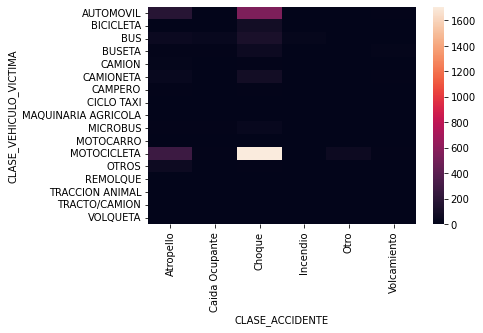

In [11]:
ax = sns.heatmap(tab1, cmap="rocket")

In [12]:
data.index

Float64Index([2.018, 2.018, 2.018, 2.018, 2.018, 2.018, 2.018, 2.018, 2.018,
              2.018,
              ...
              2.016, 2.016, 2.016, 2.016, 2.016, 2.016, 2.016, 2.016, 2.016,
              2.016],
             dtype='float64', name='AÑO_ACCIDENTE', length=3539)

In [13]:
tab = data['MES_ACCIDENTE'].value_counts().rename_axis('label').reset_index(name='counts')
tab

,label,counts
0,Mayo,370
1,Marzo,363
2,Enero,343
3,Abril,337
4,Noviembre,328
5,Febrero,324
6,Octubre,277
7,Junio,269
8,Agosto,269
9,Septiembre,259


###Datos temporales

In [14]:
temp= alt.Chart(tab).mark_area(
    clip=True,
    interpolate='monotone'
).encode(
    alt.X('label', 
          scale=alt.Scale(zero=True, nice=True)),
    alt.Y('counts:Q', title='counts', 
          axis=alt.Axis(format='0f')),
    opacity=alt.value(5)
).properties(
    width=1000,
    height=250
)
temp

alt.Chart(...)

¿Qué? 

Utilizamos datos de tipo temporal donde se seleccionamos una variable cualitativa (meses) y una variable cuantitativa (cantidad de victimas) acerca de la accidentalidad en Barranquilla para el lapso de tiempo  en años de 2016-2018.

¿Por qué? 

Ilustrar la cantidad de accidentes según el mes y poder comparar entre estos para notar picos de accidentes.

¿Cómo?

Se utiliza un encode alineado el cual realiza la comparación de manera y eficiente.

Marcas y Canales 

Se utiliza la marca de areas y el canal de posición espacial de forma vertical (Cantidad de accidentes) y horizontal (Mes).

Mejoras posibles 

Agregar observaciones con figuras y colores distintivos para variables cualitativas como el tipo de vehiculo, clase de accidente, etc.

Ayuda visual de mayor cantidad de accidentes por mes

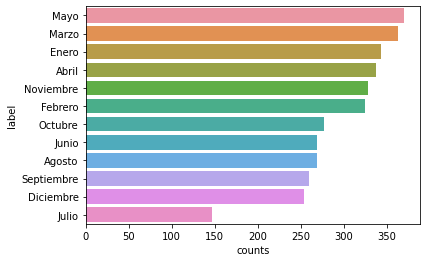

In [15]:
sns.barplot(data = tab
                ,x = "counts"
                ,estimator = sum,
                y = "label",
                ci = None,orient="h")

###Datos espaciales

In [16]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [60]:
lat=[10.9878]*343
lat

[10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,
 10.9878,


In [63]:
longg=[-74.7889]*343
longg

[-74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,

In [64]:
tab_ene = data[data["MES_ACCIDENTE"] == "Enero"]
tab_ene

,MES_ACCIDENTE,CONDICION_VICTIMA,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SERVICIO_VEHICULO_VICTIMA,CLASE_VEHICULO_VICTIMA,SEXO_VICTIMA,EDAD_VICTIMA,CANTIDAD_VICTIMAS,MES
AÑO_ACCIDENTE,,,,,,,,,,
2.018,Enero,Peaton,herido,Atropello,PARTICULAR,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,M,11.0,1.0,1.0
2.018,Enero,Acompañante,herido,Choque,PARTICULAR,CAMIONETACAMIONETACAMIONETACAMIONETACAMIONETAC...,F,13.0,1.0,1.0
2.018,Enero,Acompañante,herido,Choque,PARTICULAR,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,M,13.0,1.0,1.0
2.018,Enero,Peaton,herido,Atropello,PARTICULAR,AUTOMOVILAUTOMOVILAUTOMOVILAUTOMOVILAUTOMOVILA...,F,14.0,1.0,1.0
2.018,Enero,Pasajero,herido,Choque,PARTICULAR,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,M,16.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2.016,Enero,Peaton,herido,Atropello,OFICIAL,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,M,34.0,1.0,1.0
2.016,Enero,Motociclista,herido,Atropello,PARTICULAR,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,M,29.0,1.0,1.0
2.016,Enero,Peaton,herido,Atropello,PARTICULAR,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,F,75.0,1.0,1.0


In [65]:
tab_ene["lat"]=np.nan
tab_ene

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,MES_ACCIDENTE,CONDICION_VICTIMA,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SERVICIO_VEHICULO_VICTIMA,CLASE_VEHICULO_VICTIMA,SEXO_VICTIMA,EDAD_VICTIMA,CANTIDAD_VICTIMAS,MES,lat
AÑO_ACCIDENTE,,,,,,,,,,,
2.018,Enero,Peaton,herido,Atropello,PARTICULAR,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,M,11.0,1.0,1.0,NaN
2.018,Enero,Acompañante,herido,Choque,PARTICULAR,CAMIONETACAMIONETACAMIONETACAMIONETACAMIONETAC...,F,13.0,1.0,1.0,NaN
2.018,Enero,Acompañante,herido,Choque,PARTICULAR,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,M,13.0,1.0,1.0,NaN
2.018,Enero,Peaton,herido,Atropello,PARTICULAR,AUTOMOVILAUTOMOVILAUTOMOVILAUTOMOVILAUTOMOVILA...,F,14.0,1.0,1.0,NaN
2.018,Enero,Pasajero,herido,Choque,PARTICULAR,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,M,16.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2.016,Enero,Peaton,herido,Atropello,OFICIAL,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,M,34.0,1.0,1.0,NaN
2.016,Enero,Motociclista,herido,Atropello,PARTICULAR,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,M,29.0,1.0,1.0,NaN
2.016,Enero,Peaton,herido,Atropello,PARTICULAR,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,F,75.0,1.0,1.0,NaN


In [68]:
tab_ene["lat"]=lat
tab_ene

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,MES_ACCIDENTE,CONDICION_VICTIMA,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SERVICIO_VEHICULO_VICTIMA,CLASE_VEHICULO_VICTIMA,SEXO_VICTIMA,EDAD_VICTIMA,CANTIDAD_VICTIMAS,MES,lat
AÑO_ACCIDENTE,,,,,,,,,,,
2.018,Enero,Peaton,herido,Atropello,PARTICULAR,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,M,11.0,1.0,1.0,10.9878
2.018,Enero,Acompañante,herido,Choque,PARTICULAR,CAMIONETACAMIONETACAMIONETACAMIONETACAMIONETAC...,F,13.0,1.0,1.0,10.9878
2.018,Enero,Acompañante,herido,Choque,PARTICULAR,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,M,13.0,1.0,1.0,10.9878
2.018,Enero,Peaton,herido,Atropello,PARTICULAR,AUTOMOVILAUTOMOVILAUTOMOVILAUTOMOVILAUTOMOVILA...,F,14.0,1.0,1.0,10.9878
2.018,Enero,Pasajero,herido,Choque,PARTICULAR,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,M,16.0,1.0,1.0,10.9878
...,...,...,...,...,...,...,...,...,...,...,...
2.016,Enero,Peaton,herido,Atropello,OFICIAL,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,M,34.0,1.0,1.0,10.9878
2.016,Enero,Motociclista,herido,Atropello,PARTICULAR,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,M,29.0,1.0,1.0,10.9878
2.016,Enero,Peaton,herido,Atropello,PARTICULAR,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,F,75.0,1.0,1.0,10.9878


In [73]:
tab_ene["longg"]=np.nan
tab_ene

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,MES_ACCIDENTE,CONDICION_VICTIMA,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SERVICIO_VEHICULO_VICTIMA,CLASE_VEHICULO_VICTIMA,SEXO_VICTIMA,EDAD_VICTIMA,CANTIDAD_VICTIMAS,MES,lat,logg,longg
AÑO_ACCIDENTE,,,,,,,,,,,,,
2.018,Enero,Peaton,herido,Atropello,PARTICULAR,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,M,11.0,1.0,1.0,10.9878,NaN,NaN
2.018,Enero,Acompañante,herido,Choque,PARTICULAR,CAMIONETACAMIONETACAMIONETACAMIONETACAMIONETAC...,F,13.0,1.0,1.0,10.9878,NaN,NaN
2.018,Enero,Acompañante,herido,Choque,PARTICULAR,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,M,13.0,1.0,1.0,10.9878,NaN,NaN
2.018,Enero,Peaton,herido,Atropello,PARTICULAR,AUTOMOVILAUTOMOVILAUTOMOVILAUTOMOVILAUTOMOVILA...,F,14.0,1.0,1.0,10.9878,NaN,NaN
2.018,Enero,Pasajero,herido,Choque,PARTICULAR,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,M,16.0,1.0,1.0,10.9878,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.016,Enero,Peaton,herido,Atropello,OFICIAL,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,M,34.0,1.0,1.0,10.9878,NaN,NaN
2.016,Enero,Motociclista,herido,Atropello,PARTICULAR,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,M,29.0,1.0,1.0,10.9878,NaN,NaN
2.016,Enero,Peaton,herido,Atropello,PARTICULAR,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,F,75.0,1.0,1.0,10.9878,NaN,NaN


In [74]:
longg=[-74.7889]*343
longg

[-74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,
 -74.7889,

In [75]:
tab_ene["longg"]=longg
tab_ene

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,MES_ACCIDENTE,CONDICION_VICTIMA,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SERVICIO_VEHICULO_VICTIMA,CLASE_VEHICULO_VICTIMA,SEXO_VICTIMA,EDAD_VICTIMA,CANTIDAD_VICTIMAS,MES,lat,logg,longg
AÑO_ACCIDENTE,,,,,,,,,,,,,
2.018,Enero,Peaton,herido,Atropello,PARTICULAR,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,M,11.0,1.0,1.0,10.9878,NaN,-74.7889
2.018,Enero,Acompañante,herido,Choque,PARTICULAR,CAMIONETACAMIONETACAMIONETACAMIONETACAMIONETAC...,F,13.0,1.0,1.0,10.9878,NaN,-74.7889
2.018,Enero,Acompañante,herido,Choque,PARTICULAR,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,M,13.0,1.0,1.0,10.9878,NaN,-74.7889
2.018,Enero,Peaton,herido,Atropello,PARTICULAR,AUTOMOVILAUTOMOVILAUTOMOVILAUTOMOVILAUTOMOVILA...,F,14.0,1.0,1.0,10.9878,NaN,-74.7889
2.018,Enero,Pasajero,herido,Choque,PARTICULAR,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,M,16.0,1.0,1.0,10.9878,NaN,-74.7889
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.016,Enero,Peaton,herido,Atropello,OFICIAL,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,M,34.0,1.0,1.0,10.9878,NaN,-74.7889
2.016,Enero,Motociclista,herido,Atropello,PARTICULAR,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,M,29.0,1.0,1.0,10.9878,NaN,-74.7889
2.016,Enero,Peaton,herido,Atropello,PARTICULAR,MOTOCICLETAMOTOCICLETAMOTOCICLETAMOTOCICLETAMO...,F,75.0,1.0,1.0,10.9878,NaN,-74.7889


In [79]:
fig = px.scatter_geo(tab_ene, 
                     lat='lat',
                     lon='longg', 
                     hover_name="SEXO_VICTIMA",
                     color="SEXO_VICTIMA",
                     center = {"lat": 10.9878 , "lon": -74.7889},
                     projection="equirectangular")
fig.show()

¿Qué?

Utilizamos datos de tipo categorico donde se seleccionamos como variable pivote el sexo de la victima en los accidentes ocurridos en Barranquilla en los años 2016-2018

¿Por qué?

Ilustrar la cantidad de accidentes por sexo en barranquilla para facil interpretacion

¿Cómo?

Se utiliza un encode alineado el cual realiza la comparación de manera y eficiente.

Marcas y Canales

Se utiliza la marca de areas y el canal de posición espacial de forma general para variable de sexo

Mejoras posibles

Obtener longitud y latitud por barrios para obtener un grafico funcional.

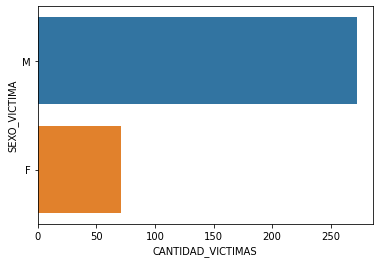

In [80]:
sns.barplot(data = tab_ene
                ,x = "CANTIDAD_VICTIMAS"
                ,estimator = sum,
                y = "SEXO_VICTIMA",
                ci = None,orient="h")